In [53]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

In [54]:
SMOKING = "smoking"
YELLOW_FINGERS = "yellow fingers"
CANCER = "cancer"
SOLAR_FLARES = "solar flares"
MICROWAVE = "microwave"
RADIATION = "radiation"
SKIN_BURN = "skin burn"

q3_model = BayesianNetwork(
    [
        (SMOKING, YELLOW_FINGERS),
        (SMOKING, CANCER),
        (SOLAR_FLARES, RADIATION),
        (MICROWAVE, RADIATION),
        (RADIATION, CANCER),
        (RADIATION, SKIN_BURN),
    ]
)


In [55]:
cpd_smoking = TabularCPD(variable=SMOKING, variable_card=2, values=[[0.9], [0.1]])

cpd_solar_flares = TabularCPD(
    variable=SOLAR_FLARES, variable_card=2, values=[[0.999], [0.001]]
)

cpd_microwave = TabularCPD(
    variable=MICROWAVE, variable_card=2, values=[[0.001], [0.999]]
)

cpd_skin_burn = TabularCPD(
    variable=SKIN_BURN,
    variable_card=2,
    values=[[0.01, 0.1], [0.99, 0.9]],
    evidence=[RADIATION],
    evidence_card=[2],
)

cpd_radiation = TabularCPD(
    variable=RADIATION,
    variable_card=2,
    values=[[0.01, 0.2, 0.3, 0.5], [0.99, 0.8, 0.7, 0.5]],
    evidence=[SOLAR_FLARES, MICROWAVE],
    evidence_card=[2, 2],
)

cpd_cancer = TabularCPD(
    variable=CANCER,
    variable_card=2,
    values=[[0.1, 0.6, 0.2, 0.9], [0.9, 0.4, 0.8, 0.1]],
    evidence=[SMOKING, RADIATION],
    evidence_card=[2, 2],
)

cpd_yellow_fingers = TabularCPD(
    variable=YELLOW_FINGERS,
    variable_card=2,
    values=[[0.1, 0.9], [0.9, 0.1]],
    evidence=[SMOKING],
    evidence_card=[2],
)


Finding Elimination Order: : 100%|██████████| 3/3 [00:08<00:00,  2.86s/it]


In [56]:
q3_model.add_cpds(
    cpd_smoking,
    cpd_solar_flares,
    cpd_microwave,
    cpd_skin_burn,
    cpd_radiation,
    cpd_cancer,
    cpd_yellow_fingers,
)

q3_model.check_model()

True

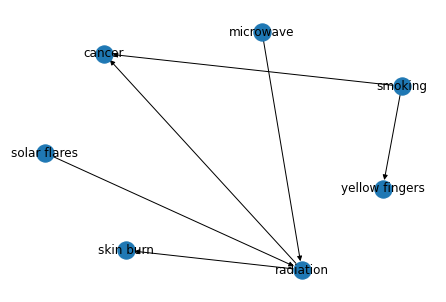

In [57]:
# Plotting
import networkx as nx
import pylab as plt

nx.draw(q3_model, with_labels=True, pos=nx.spring_layout(q3_model))
plt.show()


In [58]:
# generate inference
q3_infer = VariableElimination(q3_model)


In [59]:
print(q3_infer.query(variables=[RADIATION], evidence={CANCER: 1}))

Eliminating: microwave: 100%|██████████| 3/3 [00:00<00:00, 330.03it/s]

+--------------+------------------+
| radiation    |   phi(radiation) |
+==============+==================+
| radiation(0) |           0.3757 |
+--------------+------------------+
| radiation(1) |           0.6243 |
+--------------+------------------+


In [60]:
print(q3_infer.query(variables=[CANCER], evidence={SKIN_BURN: 1}))

Eliminating: radiation: 100%|██████████| 4/4 [00:00<00:00, 350.61it/s]

+-----------+---------------+
| cancer    |   phi(cancer) |
+===========+===============+
| cancer(0) |        0.5178 |
+-----------+---------------+
| cancer(1) |        0.4822 |
+-----------+---------------+


In [61]:
print(q3_model.local_independencies(SOLAR_FLARES))
print("-" * 75)
print(q3_model.local_independencies(SMOKING))

(solar flares ⟂ smoking, microwave, yellow fingers)
---------------------------------------------------------------------------
(smoking ⟂ microwave, solar flares, skin burn, radiation)


In [62]:
print(q3_infer.query(variables=[CANCER], evidence={MICROWAVE: 0}))





Eliminating: radiation: 100%|██████████| 3/3 [00:00<00:00, 304.32it/s]


+-----------+---------------+
| cancer    |   phi(cancer) |
+===========+===============+
| cancer(0) |        0.6246 |
+-----------+---------------+
| cancer(1) |        0.3754 |
+-----------+---------------+
